# CEWA-566: Satellite Remote Sensing for Water Resources

## Data Exploration in Google Earth Engine   

**Recap:**  
In Last Class, we talked about:

    1. Earth engine Vs Client obiects  
    2. Earth Engine Web Interface  
    3. Earth Engine Python API (set-up, activate and initialization)  
    4. Earth Engine Images
    5. Masking, Clipping and doing computations with Images.
    6. Extracting metadata and image properties
    
**Today:**  
In this class, we will use example of precipitation dataset and will talk about:

    1. Datasets in Earth Engine
    2. Earth Engine Image Collections
    3. How to explore dataset
    4. Reducing Datasets
    5. Writing custom functions to estimate variables from an image collection
    6. Understaning Computational/Coding Errors and Handling them in GEE. (Best Prectices)

### Initialization

In [ ]:
import ee
import numpy as np
import geemap

In [ ]:
ee.Initialize()

### Image Collection 

An ImageCollection is a stack or sequence of images. An ImageCollection can be loaded by pasting an Earth Engine asset ID into the ImageCollection method. You can find ImageCollection IDs in the [data catalog](https://developers.google.com/earth-engine/datasets).

We will explore IMERG precipitation dataset provided by GPM satellite measurement. Click [here](https://developers.google.com/earth-engine/datasets/catalog/NASA_GPM_L3_IMERG_V06#description) and:

    1. Read about the dataset description.
    2. Read about the different bands of the images in the dataset.

In [ ]:
# Creating an EE instance for Imerg data collection/dataset
gpm_collection = ee.ImageCollection("NASA/GPM_L3/IMERG_V06")

#### Getting size of Image collection

In [ ]:
# Printing number of images in this collection
print('Total images in the GPMv6 dataset is: ',gpm_collection.size().getInfo())

#### Getting first Image in the collection

In [ ]:
# taking first image in the collection
first_image = gpm_collection.first()
# Reading properties of the image 
############## Complete the code ###############

#### Plotting first Image in the collection

**Please Note**: If we use ```Map.add_colorbar(Precip_Viz_params, label="Precipitation (mm/hr)", layer_name="First image")```
, then the colorbar becomes assosciated with a particular layer. If you turn off the layer, it will also turn off the colorbar. Since, we are using minimum and maximum values to define a colorbar, we don't need to assosciate it with a particular layer.

In [ ]:
# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params = {'min': 0, 'max': 30, 'palette': ['white', 'red']}

# Taking first image in the collection and adding it to the map
Map.addLayer(first_image.select('IRprecipitation'), Precip_Viz_params, "First image", opacity=0.7)

# Adding colorbar
Map.add_colorbar(Precip_Viz_params, label="Precipitation (mm/hr)")

Map

#### Filtering an image collection

Earth Engine provides a variety of convenience methods for filtering image collections. You can filter:

    1. by date
    2. by location
    3. by metadata

#### Filter by Dates

In [ ]:
date_filtered_collection = gpm_collection.filterDate('2023-10-12', '2023-10-15')

In [ ]:
# Printing number of images in this collection
print('Total images in the dates filtered GPMv6 dataset is: ',date_filtered_collection.size().getInfo())

In [ ]:
# Taking first image in the collection
############## Complete the code ###############
date_filtered_first_image = 
# Adding the image to the map
Map.addLayer(date_filtered_first_image.select('precipitationCal'), Precip_Viz_params, "Date Filtered First image", opacity=0.5)

Map

#### Filter by Location

In [ ]:
# Defining region of interest as Seattle with a 30 Km radius
roi = ee.Geometry.Point([-122.3328, 47.6061]).buffer(30000)
# Filtering image collection based on region of interest
loc_filtered_collection = gpm_collection.filterBounds(roi)

In [ ]:
# Printing number of images in this collection
############## Complete the code ###############
print('Total images in the location filtered GPMv6 dataset is: ',)

In [ ]:
# Taking first image in the collection
loc_filtered_first_image = loc_filtered_collection.first()
# Adding the image to the map
Map.addLayer(loc_filtered_first_image.select('precipitationCal'), Precip_Viz_params, "Loc Filtered First image", opacity=0.7)

Map

#### Filter by Metadata

Custom filters or combination of filters can be passed to filter method of Image collections. These filters have to be earth engine objects and to create them one can use ```ee.Filter()``` as you use ```ee.List()``` to define a list in earth engine. Click on the below link to know more about the filter constructor (method) available to define filters in earth engine. 

https://developers.google.com/earth-engine/apidocs/ee-filter

Example: If the image metadata has a property 'CLOUD_COVER', one can create a filter as 
```cloud_filter = ee.Filter.lt('CLOUD_COVER', 10)``` and then pass this filter to filter images in an image collection.

In [ ]:
# Defining a filter
doy_filter = ee.Filter.dayOfYear(start=5, end=10)
# Filtering based on the custom filter created
doy_filtered_collection = gpm_collection.filter(doy_filter)

In [ ]:
# Printing number of images in this collection
print('Total images in the doy filtered GPMv6 dataset is: ',doy_filtered_collection.size().getInfo())

In [ ]:
# Taking first image in the collection
doy_filtered_first_image = doy_filtered_collection.first()
# Adding the image to the map
Map.addLayer(doy_filtered_first_image.select('precipitationCal'), Precip_Viz_params, "DOY Filtered First image", opacity=0.7)

Map

**Zoom into Seattle area in the above map**  
You can now see there is some precipitation in Pacific Nortwest because we know in January it rains in this area. But still this is just an image representing rainfall rate for half an hour of a particular day. We cannot relate this image to monthly precipitation or Seasonal rainfall pattern as it is insufficient data to comment anything.

#### Getting Image Collection Properties

One can use aggregate_* methods for ee.ImageCollection to know about a certain property for the whole collection.

Click [here](https://developers.google.com/earth-engine/apidocs/ee-imagecollection) to check all aggregate_* methods available on the left side.

In [ ]:
# Selecting a property
prop = 'system:asset_size'
# Applying date filter to select one day of data (12th October 2023)
############## Complete the code ###############
date_filtered_collection = 
# Printing information related to the property for all images in the collection 
print('List of property values:', date_filtered_collection.aggregate_array(prop).getInfo())
print('Count of property values:', date_filtered_collection.aggregate_count(prop).getInfo())
print('Count of distinct property values:',
      date_filtered_collection.aggregate_count_distinct(prop).getInfo())
print('First collection element property value:',
      date_filtered_collection.aggregate_first(prop).getInfo())
print('Min of property values:', date_filtered_collection.aggregate_min(prop).getInfo())
print('Max of property values:', date_filtered_collection.aggregate_max(prop).getInfo())

In [ ]:
print('Mean of property values:',
      date_filtered_collection.aggregate_mean(prop).getInfo())
print('Sum of property values:',
      date_filtered_collection.aggregate_sum(prop).getInfo())
print('Product of property values:',
      date_filtered_collection.aggregate_product(prop).getInfo())
print('Std dev (sample) of property values:',
      date_filtered_collection.aggregate_sample_sd(prop).getInfo())
print('Variance (sample) of property values:',
      date_filtered_collection.aggregate_sample_var(prop).getInfo())
print('Std dev (total) of property values:',
      date_filtered_collection.aggregate_total_sd(prop).getInfo())
print('Variance (total) of property values:',
      date_filtered_collection.aggregate_total_var(prop).getInfo())
print('Summary stats of property values:')
print(date_filtered_collection.aggregate_stats(prop).getInfo())


#### Reducing an Image Collection 

To get some meaningful information or insights from these datasets, one usually has to reduce the image collections or image. There are several ways, one can achieve this.

**Selecting a band of an image collection**

In [ ]:
# Selecting a particular band for the whole image collection
cal_precip_gpm_collection = gpm_collection.select('precipitationCal')
# Printing band names in the collection
print('The bands present in gpm_collection are:', gpm_collection.first().bandNames().getInfo())
print('The bands present in cal_precip_gpm_collection are:', cal_precip_gpm_collection.first().bandNames().getInfo())

**Reducing an image collection to a single image**

Let's calculate mean precipitation rate at a global scale for September,2023.

For this we will use reduce method of image collection. It requires a reducer object in earth engine as argument similar to the way as filter method requires a filter object. Since we want to get the mean, we will use mean reducer ```ee.Reducer.mean().```

You can click [here](https://developers.google.com/earth-engine/apidocs/ee-reducer-mean) to see different reducers available on the left side. 

**Example 1: Mean Precipitation**

In [ ]:
# Taking mean of the image collection
Oct_15_gpm_precip_mean = cal_precip_gpm_collection.filterDate('2023-10-15','2023-10-16').reduce(ee.Reducer.mean())

In [ ]:
# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params = {'min': 0, 'max': 30, 'palette': ['white', 'red']}

# Taking first image in the collection and adding it to the map
Map.addLayer(cal_precip_gpm_collection.filterDate('2023-10-15','2023-10-16').first(), Precip_Viz_params, "Precipitation Rate 15th Oct 2023 00:00-00:29", opacity=0.7)
# Adding the reduced image to the map
Map.addLayer(Oct_15_gpm_precip_mean, Precip_Viz_params, "Mean Precipitation Rate 15th Oct 2023", opacity=0.7)

# Adding colorbar
Map.add_colorbar(Precip_Viz_params, label="Precipitation (mm/hr)")

Map

You can see the mean precipitation is very light in color. It is due to the fact that precipitation usually occurs for 2-3 hours in a day and rest of the time it is zero. When we consider mean precipitation for day, it will be biased because for most hours it was zero precipiation. To address this issue, we can change the units of precipitation to mm/day instead of mm/hr. Also, we will have to change the colorbar as we convert the units.

To get precipitation in mm/day, we will use sum reducer. ```ee.Reducer.sum()```

**Example 2: Total Precipitation**

In [ ]:
# Taking mean of the image collection
Oct_15_gpm_precip_sum = cal_precip_gpm_collection.filterDate('2023-10-15','2023-10-16').reduce(ee.Reducer.sum()).divide(2)

**Please Note, we have divided the sum by 2. Why?**

In [ ]:
# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params_hourly = {'min': 0, 'max': 30, 'palette': ['white', 'red']}
# Defining visualisation parameters for daily precipitation with blue in color and max ranging to 100
############## Complete the code ###############
Precip_Viz_params_daily = 

# Taking first image in the collection and adding it to the map
Map.addLayer(cal_precip_gpm_collection.filterDate('2023-10-15','2023-10-16').first(), Precip_Viz_params, "Precipitation Rate 15th Oct 2023 00:00-00:29", opacity=0.7)
# Adding the mean reduced image to the map
Map.addLayer(Oct_15_gpm_precip_mean, Precip_Viz_params_hourly, "Mean Precipitation Rate 15th Oct 2023", opacity=0.7)
# Adding the sum reduced image to the map
Map.addLayer(Oct_15_gpm_precip_sum, Precip_Viz_params_daily, "Total Precipitation 15th Oct 2023", opacity=0.7)


# Adding colorbar
Map.add_colorbar(Precip_Viz_params_hourly, label="Precipitation (mm/hr)")
# Adding colorbar for daily precipitation
############## Complete the code ###############

Map

So, we have learnt how we can get total precipitation per day for any particular day. Now, let's see how can we get time series of total precipitation for the year 2022 at a global scsle.  

We can achieve this in two steps:

    1. Define a function to calculate daily total precipitation in mm/day for one day.
    2. Apply that function to the images from the image collection for each day of the year 2022.
    
Now to do step 1, think:

    1. What will be the inputs?  
    2. What will be your output?

**Example 3: Time Series of Total Daily Precipitation**

***Step 1:***

In [ ]:
# Importing Pandas & Datetime for creating lists of dates
import pandas as pd
import datetime

In [ ]:
pd.date_range(start="2022-01-01",end="2022-12-31")

In [ ]:
def total_daily_precip(date, image_collection, freq, band):
    """This function calculates an earth engine image of daily precipitation for a guven date in mm/day.

    Parameters
    ----------
    date : datetime64[ns]
        The date for which total daily precipitation needs to be calculated.
    image_collection : ee.imagecollection
        An ee.image collection object containing the precipitation data in mm/hr at a constant frequency. This collection should contain (not exclusively)
        all the images for the date provided.
    freq: float
        The hourly frequency of observed precipitation images in the provided image collection.
    band: string
        The name of the band that will be used to estimate daily precipitation.
        
    Returns
    -------
    ee.image
        an ee.image object representing the daily precipitation in mm/day for a given date.
    """
    ## Getting only date from the timestamp
    date = date.date()
    
    ## Calculating end date
    end_date = date + datetime.timedelta(days=1)
    
    ## Filtering image collection & selecting the particular band. Please note that filterDate method only accepts dates as string.
    day_filtered_collection = image_collection.filterDate(str(date),str(end_date)).select(band)
    
    ## Reducing image collection to a single image by calculating sum of total precipitation
    day_total_precipitation = day_filtered_collection.reduce(ee.Reducer.sum()).multiply(freq)
    
    ## Adding date to the metadata of the image
    # day_total_precipitation = day_total_precipitation.set({'system:time_start':day_filtered_collection.first().get('system:time_start')})
    day_total_precipitation = day_total_precipitation.set({'system:time_start':str(date)})
    
    ## Return the computed image
    return day_total_precipitation
    

***Step 2:***

In [ ]:
# Create a list of required dates
dates_list = pd.date_range(start="2022-01-01",end="2022-12-31")

# Create an empty earth engine list where we will collect all the daily images
daily_precip_list = ee.List([])

# Starting a loop for each date in the date list
for date in dates_list:
    # Apply the function to calculate daily precipitation in mm/day
    day_total_precipitation_image = total_daily_precip(date=date, image_collection=gpm_collection, freq=0.5, band='precipitationCal')
    # Add the returned image to the list to store it
    daily_precip_list = daily_precip_list.add(day_total_precipitation_image)

# Create an image collection using the list
daily_precip_collection = ee.ImageCollection(daily_precip_list)    

**Try printing the daily_precip_collection and see what structure do you get? What do you think it represents?**

In [ ]:
# Check the size of the daily precip image collection
print('Total images in the dataset daily_precip_collection are:', daily_precip_collection.size().getInfo())

In [ ]:
# Getting the properties of the first image in the collection
############## Complete the code ###############

Note the band name has been appended by '_sum'. So, it is recommended to rename the band name.  
**Also, do you think there is something missing in the properties?**

In [ ]:
daily_precip_collection = daily_precip_collection.select(['precipitationCal_sum'],['precipitationCal_agg'])

In [ ]:
date = '2022-10-15'

# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params_daily = {'min': 0, 'max': 100, 'palette': ['white', 'blue']}

# Adding the aggregated precipitation image to the map
Map.addLayer(daily_precip_collection.filter(ee.Filter.eq('system:time_start',date)), Precip_Viz_params_daily, "Total Precipitation: "+date, opacity=0.7)

# Adding colorbar
Map.add_colorbar(Precip_Viz_params_daily, label="Precipitation (mm/day)")

Map

Great! Now, **can you create a more generalized function to compute an image collection of daily total precipitation for any time period?**

**Hints**

1. Use the cell below **step 2** to wrap by a function. Let's call it *create_daily_precip_collection()*.
2. Replace Hard coded data like dates with input arguments of the function.
3. Don't forget to include the arguments of function *total_daily_precip* as the arguments of *create_daily_precip_collection* as well to keep the generalisation of the function. Also, replace the values of these arguments by their general variable names.
4. Return the image collection at the end.

Use this function to compute daily total precipitation image collection for the year 2021.

In [ ]:
############## Complete the code ###############
def create_daily_precip_collection():
    ''' Creates an earth engine image collection having the daily precipitation aggregates in mm/day for a given duration.
    
    Parameters
    ----------
    start_date : str
        The start date of the duration for which total daily precipitation needs to be calculated.
    end_date : str
        The end date of the duration for which total daily precipitation needs to be calculated.
    image_collection : ee.imagecollection
        An ee.image collection object containing the precipitation data in mm/hr at a constant frequency. This collection should contain (not exclusively)
        all the images for the date provided.
    freq: float
        The hourly frequency of observed precipitation images in the provided image collection.
    band: str
        The name of the band that will be used to estimate daily precipitation.
        
    Returns
    -------
    ee.ImageCollection
        an ee.ImageCollection object representing the daily precipitation in mm/day for a given duration.
    '''

In [ ]:
daily_precip_collection_2021 = create_daily_precip_collection(start_date="2021-01-01",end_date="2021-12-31",image_collection=gpm_collection, freq=0.5, band='precipitationCal')

In [ ]:
date = '2021-12-25'

# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params_daily = {'min': 0, 'max': 100, 'palette': ['white', 'blue']}

# Adding the aggregated precipitation image to the map
Map.addLayer(daily_precip_collection_2021.filter(ee.Filter.eq('system:time_start',date)), Precip_Viz_params_daily, "Total Precipitation: "+date, opacity=0.7)

# Adding colorbar
Map.add_colorbar(Precip_Viz_params_daily, label="Precipitation (mm/day)")

Map

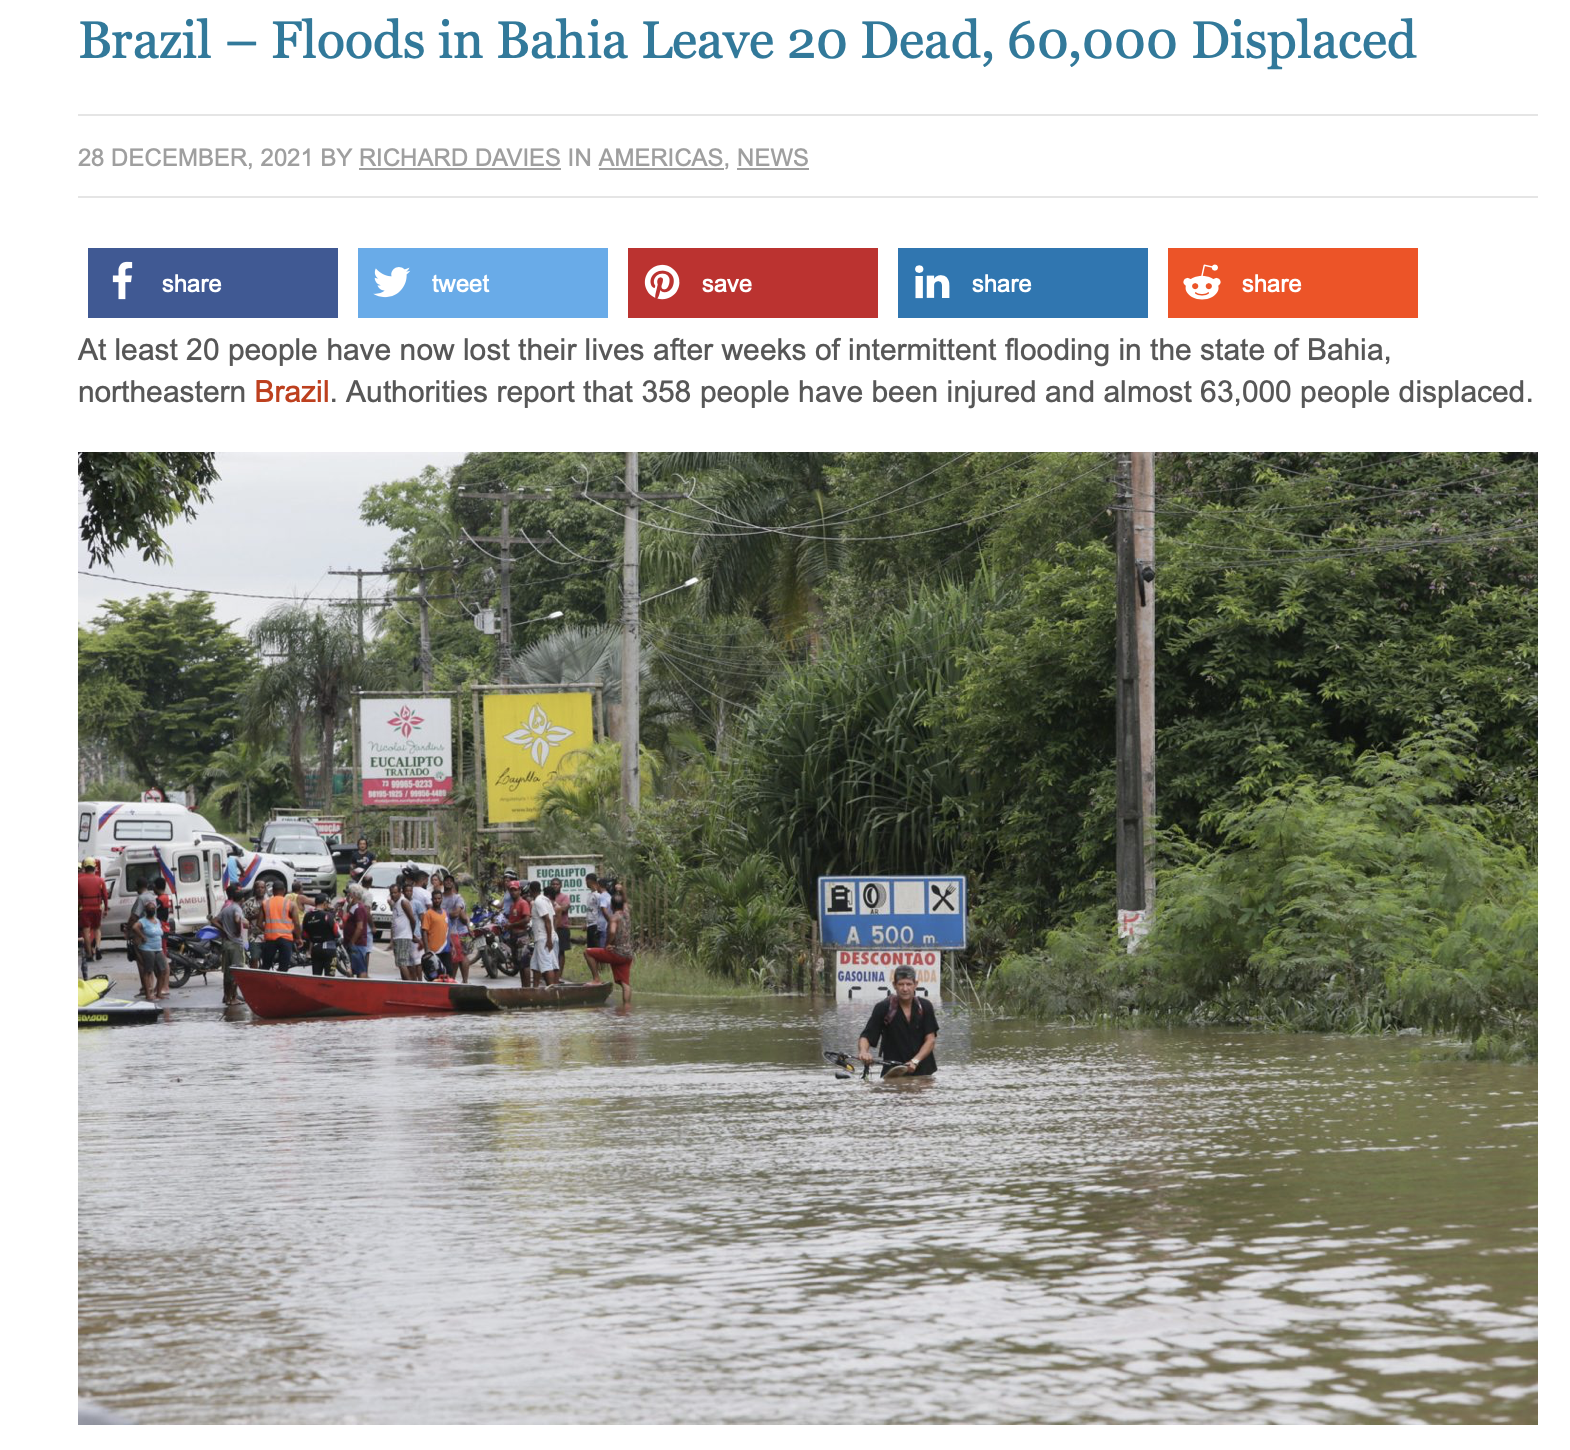

As shown in the news article, there was a disastrous flood at the time of Christmas in Bahia and two of the dams got washed away in the floods. 

Let's search Bahia in the map above and see if there was any significant rainfall that you can note on the visual map. If not, try using a different color palette. Import colormaps as cm and use ```cm.list_colormaps``` to see the list of available colormaps

In [ ]:
# Importing colormaps module to get the different palettes avaiable
import geemap.colormaps as cm
# cm.list_colormaps()

In [ ]:
# Getting the rainbow color palette 
rainbow_palette = cm.palettes.rainbow

In [ ]:
date = '2021-12-25'

# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params_daily = {'min': 0, 'max': 100, 'palette': rainbow_palette}

# Adding the aggregated precipitation image to the map
Map.addLayer(daily_precip_collection_2021.filter(ee.Filter.eq('system:time_start',date)), Precip_Viz_params_daily, "Total Precipitation: "+date, opacity=0.7)

# Adding colorbar
Map.add_colorbar(Precip_Viz_params_daily, label="Precipitation (mm/day)")

Map

Now, it's much more clearly visible the high precipitation in Bahia, Brazil. About 50-100 mm precipitation in a day. Also, you might have got a better idea that we need to use color palette carefully just like remote sensing's golden rule. **The target values you are looking for should be different than the background.**

**Example 4: Maximum Observed Precipitation**

**Now last suppose, we want to see the maximum observed precipitation at each location globally from 2000-2021 or 2000-2022. How can we achieve that?**

Click [here](https://developers.google.com/earth-engine/apidocs/ee-imagecollection-max) and see if this is what you were thinking.

In [ ]:
# Computing the daily precipitation for duration of more than a decade
daily_precip_collection_2000_2021 = create_daily_precip_collection(start_date="2020-01-01",end_date="2021-12-31",image_collection=gpm_collection, freq=0.5, band='precipitationCal')
# Taking maximum at each pixel from the stack of images
max_daily_precip_2000_2021 = daily_precip_collection_2000_2021.max()

In [ ]:
# Computing the number of images in the collection
daily_precip_collection_2000_2021.size().getInfo()

So, it resulted in an error. Looks like this is too much for Google Earth Engine or do we have some error in the code. Let's try 2010 instead of 2000.

Any luck? Still not, try replacing 2010 with 2019 and then 2020. See if the code works.

**If yes, then the code is fine. What do you think is possibly going wrong? How can we fix it?**

In [ ]:
# Initiating the collection with year 2001 and then merging data by computing year by year
year = 2001
daily_precip_collection_multi_decadal = create_daily_precip_collection(start_date=str(year)+"-01-01",end_date=str(year)+"-12-31",image_collection=gpm_collection, freq=0.5, band='precipitationCal')
for year in range(2002,2022):
    single_year_daily_precip_collection = create_daily_precip_collection(start_date=str(year)+"-01-01",end_date=str(year)+"-12-31",image_collection=gpm_collection, freq=0.5, band='precipitationCal')
    daily_precip_collection_multi_decadal = daily_precip_collection_multi_decadal.merge(single_year_daily_precip_collection)

In [ ]:
# Getting the size of the image collection
daily_precip_collection_multi_decadal.size().getInfo()

In [ ]:
# Taking maximum at each pixel from the stack of images
max_daily_precip_observed = daily_precip_collection_multi_decadal.max()

In [ ]:
# Getting the image properties of maximum observed precipitation
geemap.image_props(max_daily_precip_observed).getInfo()

Please note we have changed the minimum and maximum values of the range of color bar to see maximum observed precipitation.

In [ ]:
# Creating an instance of map
Map = geemap.Map()

# Defining visualisation parameters for precipitation
Precip_Viz_params_daily = {'min': 50, 'max': 150, 'palette': rainbow_palette}

# Adding the max observed precipitation image to the map
Map.addLayer(max_daily_precip_observed, Precip_Viz_params_daily, "Max Observed Precipitation from 2001-2022", opacity=0.7)

# Adding colorbar
Map.add_colorbar(Precip_Viz_params_daily, label="Precipitation (mm/day)")

Map

Don't Worry if map is not showing up. Give it some time like 5-10 minutes it will show up. For the time being, you can refer to the below map:

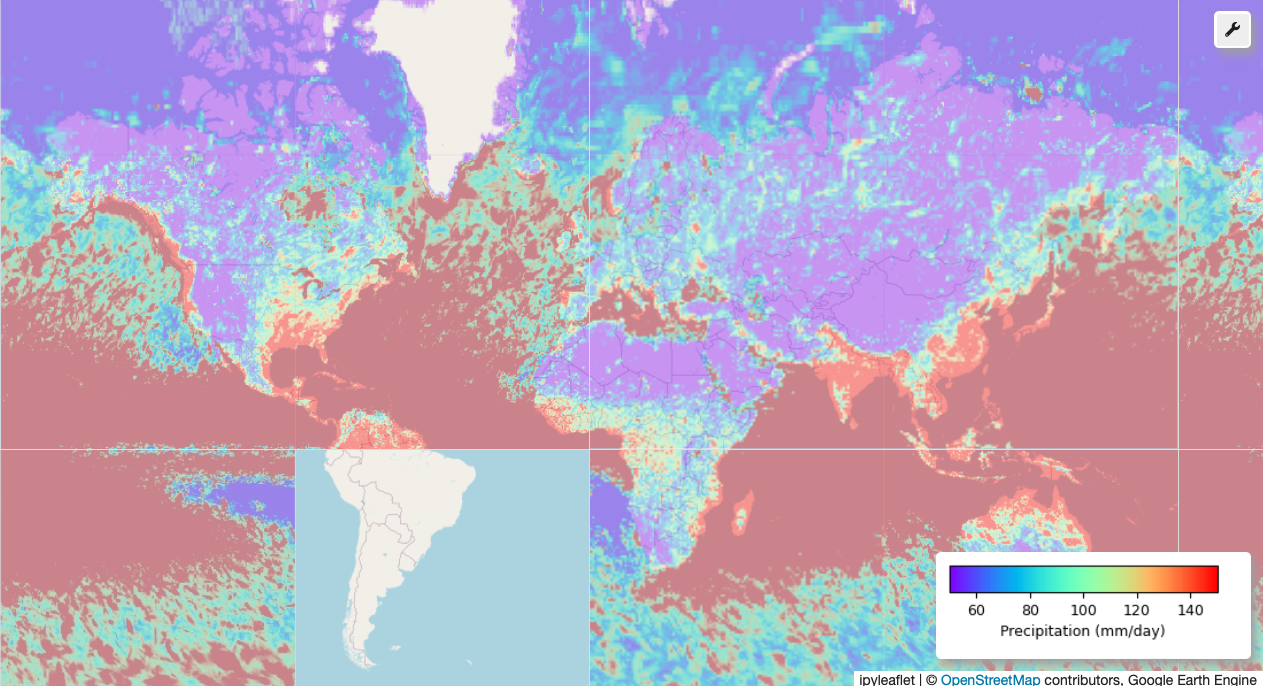

**Is this map same as Probable Maximum Precipitation? Why/Why not?**

## Thank You & Have Fun! 😃